In [1]:
import sys
sys.path.append('/content/drive/My Drive/object_pose_estimation_online')
from Classes.CameraCalibration import *

In [2]:
baselink_camera_transformations = []

In [3]:
intrinsic_camera_matrix_file = '/content/drive/My Drive/object_pose_estimation_online/data/matrix_files/intrinsic_camera_properties.npz'
robot_camera_calibration_images_file = '/content/drive/My Drive/object_pose_estimation_online/data/camera_robot_calibration_images/CRC_image_original_*.jpg'
baselink_target_transformations_file = '/content/drive/My Drive/object_pose_estimation_online/data/camera_robot_calibration_images/baselink_target_transformations.npy'
mean_baselink_camera_transformation_file = '/content/drive/My Drive/object_pose_estimation_online/data/matrix_files/mean_baselink_camera_transformation'

In [4]:
# Load intrinsic camera matrix and distortion coefficients
mtx, dist = load_intrinsic_camera_matrix(intrinsic_camera_matrix_file)

In [5]:
# Get all corresponding transformation matrices (numpy data)
baselink_target_transformations = get_numpy_data(baselink_target_transformations_file)

In [6]:
# Find all image paths
images = get_image_path_names(robot_camera_calibration_images_file)

In [7]:
# Prepare object points in 3D space in meters
objp = get_object_points()

In [8]:
# Declare counter to loop through all transformations
counter = 0

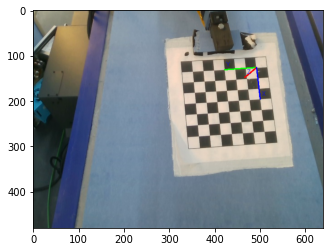

In [9]:
# Loop through all images and corresponding transformations
for image in images:

    # Read image
    frame = read_image(image)

    # Turn image to grayscale
    gray = image_to_grayscale(frame)

    # Find the corners in the chessbord calibration tool
    corners = find_corners(gray)

    # Get extrinsic camera calibration matrix (camera-target transform)
    ct_transform = extrinsic_calibration(frame, objp, corners, mtx, dist)

    # Invert the transform
    tc_transform = invert_transform(ct_transform)

    # Get corresponding Baselink - Target transform using the counter (ith transformation)
    bt_transform = baselink_target_transformations[counter]

    # Compute Baselink - Camera transform
    bc_transform = multiply_transforms(bt_transform, tc_transform)

    # Add (append) to the baselink_camera_transformations list
    baselink_camera_transformations.append(bc_transform)

    # Count up
    counter +=1

In [10]:
# Compute mean baselink - camera transformation by passing the transformation list
mbc_transformation = compute_mean_transformation(baselink_camera_transformations)

In [11]:
# Save the mean baselink - camera transformation matrix
save_to_numpy(mean_baselink_camera_transformation_file, mbc_transformation)

In [12]:
print("\nMean camera-robot transformation")
print(mbc_transformation)

print('\nCamera-robot calibration finished')


Mean camera-robot transformation
[[ 0.99542586  0.08506224 -0.04349443 -0.03149761]
 [ 0.09515727 -0.92332011  0.37205517 -1.04260919]
 [-0.00851143 -0.37449215 -0.92719101  0.73889702]
 [ 0.          0.          0.          1.        ]]

Camera-robot calibration finished
